In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import nltk
from nltk import FreqDist
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from wordcloud import WordCloud,STOPWORDS
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
import re,string,unicodedata
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score,f1_score
from sklearn.model_selection import train_test_split
from string import punctuation
from nltk import pos_tag
from nltk.corpus import wordnet
from nltk.corpus import stopwords
from sklearn.pipeline import Pipeline
from numpy import array
from nltk.stem import PorterStemmer
ps = PorterStemmer()
import re
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("Mental_Health_FAQ.csv",encoding='ISO-8859-1')

In [3]:
df.head()

,Question_ID,Questions,Answers
0,1590140,What does it mean to have a mental illness?,Mental illnesses are health conditions that di...
1,2110618,Who does mental illness affect?,It is estimated that mental illness affects 1 ...
2,6361820,What causes mental illness?,It is estimated that mental illness affects 1 ...
3,9434130,What are some of the warning signs of mental i...,Symptoms of mental health disorders vary depen...
4,7657263,Can people with mental illness recover?,"When healing from mental illness, early identi..."


In [4]:
df.shape

(98, 3)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 98 entries, 0 to 97
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Question_ID  98 non-null     int64 
 1   Questions    98 non-null     object
 2   Answers      98 non-null     object
dtypes: int64(1), object(2)
memory usage: 2.4+ KB


In [6]:
df.isnull().sum()

Question_ID    0
Questions      0
Answers        0
dtype: int64

In [7]:
nltk.download('stopwords')
nltk.download('wordnet')

# Initialize lemmatizer and stop words
lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words('english'))

# Function for cleaning text
def clean_text(text):
    text = text.lower()  # Convert to lowercase
    text = re.sub(r'\W+', ' ', text)  # Remove punctuation
    words = text.split()  # Split text into words
    words = [lemmatizer.lemmatize(word) for word in words if word not in stop_words]  # Lemmatize and remove stopwords
    return ' '.join(words)

# Apply cleaning to both questions and answers
df['Clean_Questions'] = df['Questions'].apply(clean_text)
df['Clean_Answers'] = df['Answers'].apply(clean_text)

# Check cleaned data
print(df[['Clean_Questions', 'Clean_Answers']].head())


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Administrator\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Administrator\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


                 Clean_Questions  \
0            mean mental illness   
1          mental illness affect   
2           cause mental illness   
3    warning sign mental illness   
4  people mental illness recover   

                                       Clean_Answers  
0  mental illness health condition disrupt person...  
1  estimated mental illness affect 1 5 adult amer...  
2  estimated mental illness affect 1 5 adult amer...  
3  symptom mental health disorder vary depending ...  
4  healing mental illness early identification tr...  


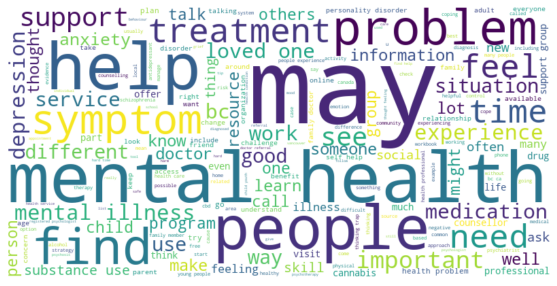

In [8]:
from collections import Counter
import matplotlib.pyplot as plt
from wordcloud import WordCloud

# Concatenate all the questions and answers
all_text = ' '.join(df['Clean_Questions']) + ' ' + ' '.join(df['Clean_Answers'])

# Generate word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_text)

# Plot the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [9]:
# Add new features
df['Question_Length'] = df['Clean_Questions'].apply(lambda x: len(x.split()))
df['Answer_Length'] = df['Clean_Answers'].apply(lambda x: len(x.split()))

# Check the newly created features
print(df[['Question_Length', 'Answer_Length']].head())


   Question_Length  Answer_Length
0                3            117
1                3            117
2                3            117
3                4            138
4                4             51


In [17]:
X= df['Clean_Questions']

In [18]:
X

0               mean mental illness
1             mental illness affect
2              cause mental illness
3       warning sign mental illness
4     people mental illness recover
                  ...              
93               know drinking much
94    cannabis dangerous legalizing
95            convince kid use drug
96    legal status evidence cbd oil
97                  evidence vaping
Name: Clean_Questions, Length: 98, dtype: object

In [20]:
# Target variable: Category of the question
y = df['Clean_Answers']

In [19]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer()
vectorizer.fit(X)
X = vectorizer.transform(X)


In [21]:
# Convert text data into TF-IDF features
vectorizer = TfidfVectorizer(max_features=500)
X = vectorizer.fit_transform(df['Clean_Questions'])

In [22]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [23]:
# Train a Naive Bayes classifier on the vectorized data
clf = MultinomialNB()
clf.fit(X_train,y_train)

MultinomialNB()

In [24]:
# Make predictions on the test set and evaluate the model
y_pred_train_NB = clf.predict(X_train)
y_pred_test_nb = clf.predict(X_test)
acc_train_1 = accuracy_score(y_train, y_pred_train_NB)
acc_test_1 = accuracy_score(y_test, y_pred_test_nb)
cm = confusion_matrix(y_test, y_pred_test_nb)

In [25]:
print("Classification report : \n",classification_report(y_test,y_pred_test_nb))
print("Training Accuracy Score",acc_train_1)
print("Testing Accuracy Score",acc_test_1)

Classification report : 
                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                               

In [26]:
import pickle

# Save the model to a file
with open('question_classifier.pkl', 'wb') as f:
    pickle.dump(clf, f)

# Save the vectorizer as well
with open('vectorizer.pkl', 'wb') as f:
    pickle.dump(vectorizer, f)
